In [1]:
import json
import numpy as np
from sklearn.metrics import accuracy_score

import pandas as pd 
from matplotlib import pyplot as plt
import collections

In [2]:
# pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
  
# data (as pandas dataframes) 
X = statlog_vehicle_silhouettes.data.features 
y = statlog_vehicle_silhouettes.data.targets 
  
# metadata 
# print(statlog_vehicle_silhouettes.metadata) 
  
# # variable information 
# print(statlog_vehicle_silhouettes.variables) 


In [4]:
np.unique(y) 

array(['204', 'bus', 'opel', 'saab', 'van'], dtype=object)

In [5]:
X_train = np.loadtxt('final_X_train.txt')
X_test = np.loadtxt('final_X_test.txt')

with open('final_y_train.txt', 'r') as iofile:
    y_train = np.array(json.load(iofile))

In [6]:
data_y = y #data['class']
data_X = X #data.drop(['class'], axis=1)

In [7]:
np.unique(y_train) 

array(['bus', 'opel', 'saab', 'van'], dtype='<U4')

In [8]:
data_y_arr = data_y.to_numpy()
data_X_arr = data_X.to_numpy() 

In [9]:
y_test = [0] * len(X_test) 

In [10]:
for x_tes in range(len(X_test)):
    for dat in range(len(data_X_arr)):
        mask = np.ones(len(X_test[x_tes]), dtype=bool)
        mask[0] = 0
        if (data_X_arr[dat] == X_test[x_tes][mask]).all():
            y_test[x_tes] = data_y_arr[dat][0]

In [11]:
y_test[142] = 'bus'

<Axes: >

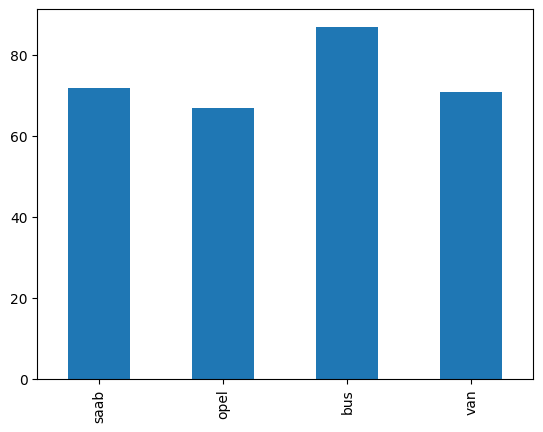

In [12]:
pd.Series(y_test).value_counts(sort=False).plot(kind='bar')

<Axes: >

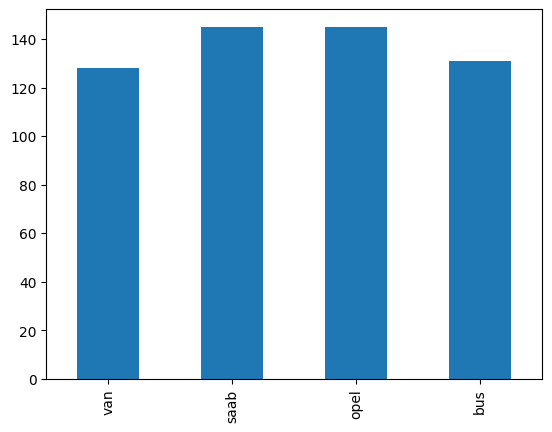

In [13]:
pd.Series(y_train).value_counts(sort=False).plot(kind='bar')

In [54]:
for i in range(len(y_test)):
    if type(y_test[i]) != str:
        print(i, type(y_test[i]), y_test[i])

142 <class 'int'> 0


In [75]:
X_test[142]

array([752., 100.,  36.,  73., 199.,  73.,   6., 162.,  40.,  20., 127.,
       189., 401., 125.,  72.,   6.,  19., 200., 204.])

In [65]:
max_corr = 10
for i in range(len(X_test[142])):
    for dat in range(len(data_X_arr)):
        mask = np.ones(len(X_test[142]), dtype=bool)
        mask[i] = 0
        if (data_X_arr[dat] == X_test[142][mask]).sum() >= max_corr:
            max_corr = (data_X_arr[dat] == X_test[142][mask]).sum()
            print(i, dat, data_X_arr[dat], data_y_arr[dat])
        # print((data_X_arr[dat] == X_test[142][mask]).sum())
        # if (data_X_arr[dat] == X_test[142][mask]).all():
        #     print(i, dat, data_X_arr[dat], data_y_arr[dat])
    

11 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
12 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
13 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
14 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
15 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
16 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
17 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']
18 752 [ nan 100.  36.  73. 199.  73.   6. 162.  40.  20. 127. 189. 401. 125.
  72.   6.  19. 200.] ['204']


In [67]:
data_y_arr[752]

array(['204'], dtype=object)

In [23]:
all_data.shape, X_train.shape[0] + X_test.shape[0] 

((846, 19), 846)

In [24]:
all_data = all_data.to_numpy() 

array([[95, 48.0, 83.0, ..., 187.0, 197, 'van'],
       [91, 41.0, 84.0, ..., 189.0, 199, 'van'],
       [104, 50.0, 106.0, ..., 188.0, 196, 'car'],
       ...,
       [106, 54.0, 101.0, ..., 187.0, 201, 'car'],
       [86, 36.0, 78.0, ..., 190.0, 195, 'car'],
       [85, 36.0, 66.0, ..., 186.0, 190, 'van']], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from my_solution import MySolutions

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


class MySolutions:
    """ a kNN classifier with L2 distance """

    def __init__(self, X_train, y_train, X_test):
        self.X_train_original = X_train
        self.y_train_original = y_train
        self.X_test_original = X_test
        pass

    def get_simple_logistic_reg(self):
        """
        Train the simple Logistic Regression classifier (from sklearn) with default hyperparameters.
        Return predicted class probabilities on the training and testing data.

        Returns:
            Predicted class probabilities and labels for train and test data in format:
            train_predicted_labels, train_predicted_probas, test_predicted_labels, test_predicted_probas
        """
        # some imports if needed
        clf = LogisticRegression().fit(X=self.X_train_original, y=self.y_train_original)
        labels_train = clf.predict(self.X_train_original)
        probas_train = clf.predict_proba(X=self.X_train_original)

        labels_test = clf.predict(self.X_test_original)
        probas_test = clf.predict_proba(X=self.X_test_original)

        return labels_train, probas_train, labels_test, probas_test

    def get_simple_naive_bayes(self):
        """
        Train the Naive Bayes classifier with Normal distribution as a prior.
        Use sklearn version (correct one!) and default hyperparameters.

        Returns:
            Predicted class probabilities for train and test data.
        """
        # some imports if needed
        gnb = GaussianNB()
        gnb.fit(X=self.X_train_original, y=self.y_train_original)

        labels_train = gnb.predict(self.X_train_original)
        probas_train = gnb.predict_proba(X=self.X_train_original)

        labels_test = gnb.predict(self.X_test_original)
        probas_test = gnb.predict_proba(X=self.X_test_original)

        return labels_train, probas_train, labels_test, probas_test

    def get_best_solution(self):
        """
        Train your best model. You can run some preprocessing (analysing the dataset might be useful),
        normalize the data, use nonlinear model etc. Get highscore!
        Please, do not use any external libraries but sklearn and numpy.

        Returns:
            Predicted class probabilities for train and test data.
        """
        # some imports if needed
        scaler = StandardScaler().fit(self.X_train_original)
        X_train_scaled = scaler.transform(self.X_train_original)
        X_test_scaled = scaler.transform(self.X_test_original)

        clf = LogisticRegression().fit(X=X_train_scaled, y=self.y_train_original)
        labels_train = clf.predict(X_train_scaled)
        probas_train = clf.predict_proba(X_train_scaled)

        labels_test = clf.predict(X_test_scaled)
        probas_test = clf.predict_proba(X_test_scaled)
        
        return labels_train, probas_train, labels_test, probas_test

In [16]:
my_solutions = MySolutions(X_train, y_train, X_test)

In [17]:
labels_train, probas_train, labels_test, probas_test = my_solutions.get_simple_logistic_reg()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy_score(labels_train, y_train)

0.7249544626593807

In [19]:
accuracy_score(labels_test, y_test)

0.6767676767676768

In [20]:
labels_train, probas_train, labels_test, probas_test = my_solutions.get_simple_naive_bayes()

In [21]:
accuracy_score(labels_test, y_test)

0.4175084175084175

In [22]:
labels_train, probas_train, labels_test, probas_test = my_solutions.get_best_solution()

In [23]:
len(labels_test)

297

In [24]:
accuracy_score(labels_test, y_test)

0.7744107744107744